# Plot LDA Results

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import stats, string views --> int view count

In [2]:
views_df = pd.read_csv('../../data_collection/data/song_stats.csv', index_col=0)
viewcount = views_df['viewcount']
views = []
for row in viewcount:
    rowstr = row[:-6]
    rowstr = re.sub(r",", "", rowstr)
    views.append(int(rowstr))
views_df['int_viewcount'] = views

# get rid of rows that are commentary
# https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
views_df = views_df[~views_df['songname'].str.contains("Commentary")]

# clean up song titles
songname = views_df['songname']
names = []
for row in songname:
    # remove Taylor Swift - at the start
    if row[:15]=='Taylor Swift - ': row = row[15:]
    # remove brackets:
    brackets = re.search(r' \(', row)
    if brackets:
        first = brackets.span()[0]
        row = row[:first]
    # convert to lower case
    row = row.lower()
    names.append(row)
views_df['fixed_songname'] = names

# now a lot of songs will have the same title, so create a new df of the maxes
max_views_per_song = []
unique_song_names = views_df['fixed_songname'].unique()
for song_name in unique_song_names:
    small_df = views_df[views_df['fixed_songname'] == song_name]
    max_views = max(small_df['int_viewcount'])

    # print(song_name)
    row = {'fixed_songname': song_name, 'views': max_views}
    max_views_per_song.append(row)
reduced_views_df = pd.DataFrame(max_views_per_song)




import lyrics

In [3]:
lyrics_df = pd.read_csv('../temp/lda_categ_song.csv', index_col=0)
# clean up song titles
songname = lyrics_df['song']
names = []
for row in songname:
    # remove Taylor Swift - at the start
    if row[:15]=='Taylor Swift - ': row = row[15:]
    # remove brackets:
    brackets = re.search(r' \(', row)
    if brackets:
        first = brackets.span()[0]
        row = row[:first]
    # convert to lower case
    row = row.lower()
    names.append(row)
lyrics_df['fixed_songname'] = names




merge the two

In [4]:
merged_dataset = lyrics_df.merge(reduced_views_df, on='fixed_songname', how='inner')
merged_dataset.loc[:,['song', 'categ', 'views']]


,song,categ,views
0,Fearless (Taylor’s Version),0,57991132
1,Fifteen (Taylor’s Version),0,157199246
2,Love Story (Taylor’s Version),0,582354652
3,Hey Stephen (Taylor’s Version),0,420351
4,White Horse (Taylor’s Version),2,150761486
...,...,...,...
64,hoax,0,7846187
65,exile (feat. Bon Iver) - the long pond studio ...,0,49397024
66,I Forgot That You Existed,0,17205344
67,Cruel Summer,0,25571645


## Graph the outcome

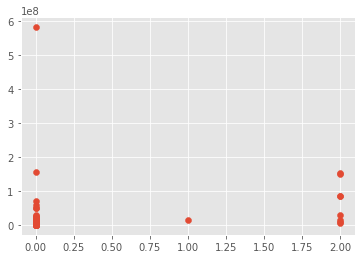

In [5]:
import matplotlib.pyplot as plt
plt.scatter(merged_dataset['categ'], merged_dataset['views'])